In [ ]:
simport matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn

In this assignment, you will upload a dataset and reproduce a few visualizations. Start by uploading the "datasets-agro.csv" dataset. 

In [ ]:
# The following is code for uploading a file to the colab.research.google 
# environment.

# library for uploading files
from google.colab import files 

def upload_files():
    # initiates the upload - follow the dialogues that appear
    uploaded = files.upload()

    # verify the upload
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))

    # uploaded files need to be written to file to interact with them
    # as part of a file system
    for filename in uploaded.keys():
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

In [41]:
# upload datasets-agro.csv
upload_files()

NameError: ignored

In [42]:
agro_df = pd.read_csv("datasets-agro.csv")

Next, use some of the EDA techniques in pandas to get a feel for the dataset scheme again.

In [43]:
agro_df.describe

<bound method NDFrame.describe of       id   water      uv   area  ...   yield  pesticides  region  categories
0      0   0.072  80.179  9.414  ...  29.878       2.231       6         c,b
1      1   5.413  58.359  9.681  ...  53.416       1.810       6         c,b
2      2   9.731  78.506  7.189  ...  63.391       2.455       1           d
3      3  10.995  69.248  1.738  ...  17.984       0.603       2           a
4      4   2.617  87.658  9.706  ...  49.768       2.910       6           c
..   ...     ...     ...    ...  ...     ...         ...     ...         ...
995  995   5.457  70.622  8.163  ...  89.809       4.224       2           c
996  996   6.931  75.326  5.675  ...  29.261       1.355       2       d,b,a
997  997  10.373  78.225  7.378  ...  76.608       5.459       2           b
998  998   9.158  79.257  9.011  ...  80.399       5.968       1     d,c,b,a
999  999   3.316  75.490  5.501  ...  43.152       4.220       3           c

[1000 rows x 9 columns]>

In [ ]:
agro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1000 non-null   int64  
 1   water             1000 non-null   float64
 2   uv                1000 non-null   float64
 3   area              1000 non-null   float64
 4   fertilizer_usage  1000 non-null   int64  
 5   yield             1000 non-null   float64
 6   pesticides        1000 non-null   float64
 7   region            1000 non-null   int64  
 8   categories        1000 non-null   object 
dtypes: float64(5), int64(3), object(1)
memory usage: 70.4+ KB


In [ ]:
agro_df.head(10)

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
0,0,0.072,80.179,9.414,0,29.878,2.231,6,"c,b"
1,1,5.413,58.359,9.681,2,53.416,1.810,6,"c,b"
2,2,9.731,78.506,7.189,1,63.391,2.455,1,d
3,3,10.995,69.248,1.738,3,17.984,0.603,2,a
4,4,2.617,87.658,9.706,1,49.768,2.910,6,c
5,5,2.190,51.727,9.152,0,35.488,1.788,3,b
6,6,10.679,79.767,6.311,1,43.157,0.458,2,a
7,7,3.620,80.430,9.473,0,32.752,3.533,5,"b,a,c"
8,8,9.857,61.683,5.240,1,57.811,5.090,1,a
9,9,4.321,79.671,6.818,0,11.650,1.255,5,"b,d"


In [ ]:
agro_df['region'].value_counts()

2    314
6    200
1    143
3    125
4    102
0     59
5     57
Name: region, dtype: int64

In [ ]:
agro_df['fertilizer_usage'].value_counts()

3    231
1    204
0    189
2    171
4    141
5     64
Name: fertilizer_usage, dtype: int64

# Visualization 1

Reproduce the bar graph found in section 1) of the supplementary document. You must choose your own title. If there are any enhancements you think would make the graph more useful (color changes or extra text), feel free to add that.

1 mark each:

*   Getting data into the correct shape
*   Plotting the bar graph
*   Having a title and axis labels



In [ ]:
average_yield_by_region = agro_df.groupby('region').mean()['yield']
display(average_yield_by_region)

region
0    57.152678
1    61.532329
2    55.769118
3    60.660840
4    79.794902
5    48.546193
6    52.935595
Name: yield, dtype: float64

In [ ]:
list(average_yield_by_region.index)

[0, 1, 2, 3, 4, 5, 6]

1 57.15267796610169
2 61.532328671328656
3 55.76911783439487
4 60.660840000000015
5 79.7949019607843
6 48.54619298245613
7 52.93559500000004


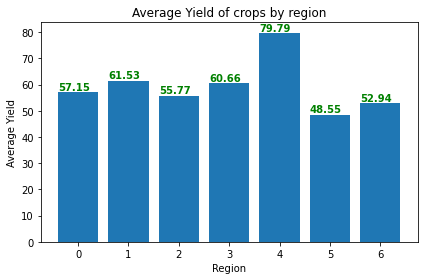

In [44]:
plt.figure()

plt.bar(list(average_yield_by_region.index),average_yield_by_region)
plt.xlabel('Region')
plt.ylabel('Average Yield')
plt.title('Average Yield of crops by region')

i = 0
for v in average_yield_by_region:
    plt.text(i-0.4 , v + .8, f'{v:.2f}', color='green', fontweight='bold')
    i += 1
    print(i,v)

plt.tight_layout()
plt.show()

#Visualization 2

Reproduce the figure found in section 2 of the supplementary document. Notice that this graph requires subplots. Please add titles and appropriate axis labels to each plot. Each plot shows data for a different region. It is very important to this task that each plot shows only the data from a single region.

Marks (1 each):

*    Identify and use the correct method for making the plot
*    Set up the subplots correctly
*    Plot data for each region in its own subplot
*    Have each subplot use a different colour
*    Include useful titles, axis labels, and have the figure be an appropriate size

In [48]:
agro_df.columns

Index(['id', 'water', 'uv', 'area', 'fertilizer_usage', 'yield', 'pesticides',
       'region', 'categories'],
      dtype='object')

In [69]:
sorted(list(agro_df['region'].unique()))


[0, 1, 2, 3, 4, 5, 6]

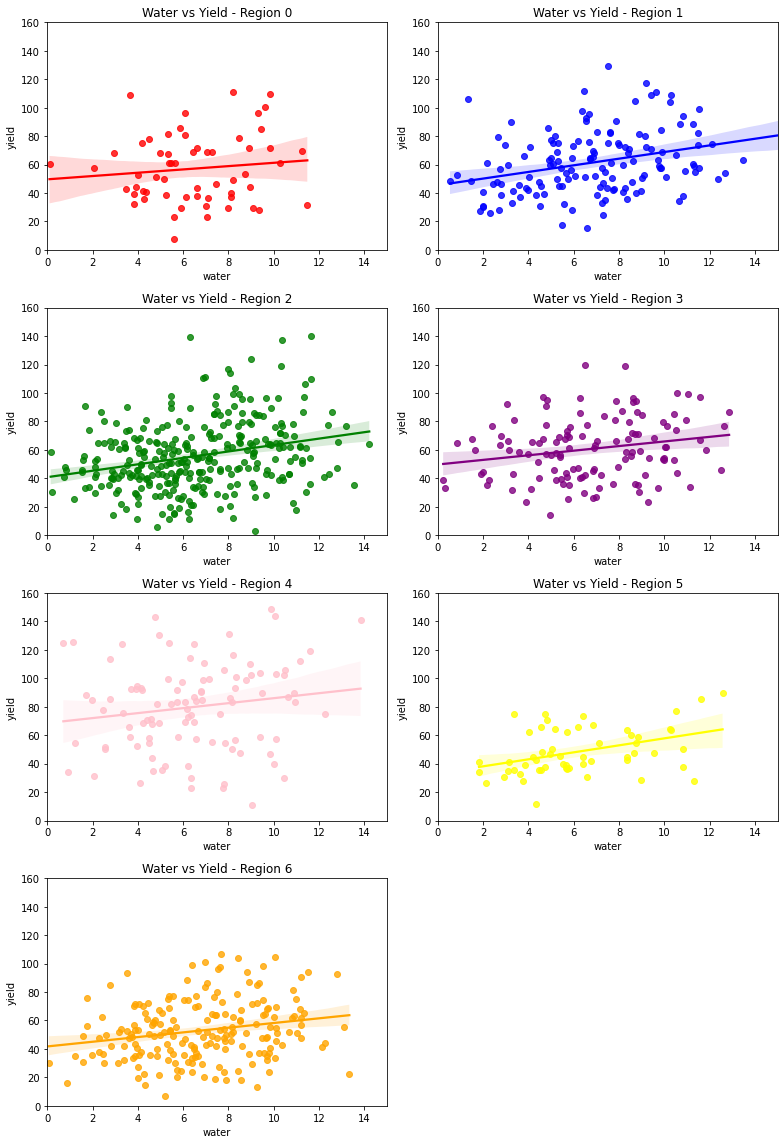

In [87]:
plt.figure(figsize = (11,16))
color = ['red', 'blue', 'green', 'purple','pink','yellow','orange']
#initiates a 4x2 subplot and selects subplot 1
for each_region in sorted(list(agro_df['region'].unique())):

  plt.subplot(4,2,each_region+1)

  seaborn.regplot(x="water",
                  y="yield",
                  data=agro_df[agro_df['region'] == each_region],
                  fit_reg=True,
                  color = color[each_region])

  title = "Water vs Yield - Region " + str(each_region)
  
  plt.xlim(0,15)
  plt.ylim(0,160)
  # Not in example figures but setting up limits to be able to compare in same ranges
  plt.title(title)
  plt.tight_layout()



plt.show()


#Visualization 3

Reproduce the figure found in section 3 of the supplementary document. The plot is showing the co-occurence frequency of two categorical variables: fertilizer_usage and region. Notice that this requires you to use a method not shown in the notes. In Data Science it is very common to have to look through an API and find an appropriate function. You can use the Seaborn API as reference:

https://seaborn.pydata.org/api.html

Also feel free to use google or stackoverflow to point you in the right direction. Please add an appropriate title and axis labels to the plot. 

Hint: In my solution, I use both groupby and pivot (dataframe methods from pandas) to help transform my data. There is probably multiple ways of transforming the required variables.

Marks:

*    Identify and use the correct method for making the plot (1 mark)
*    Transform data for use with the method you found (2 marks)
*    Normalize data (notice the range of values on the right side of the graph) (1 mark)
*    Include useful titles, axis labels, and have the figure be an appropriate size (1 mark)

Correct method: https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

In [138]:
agro_df_3 = agro_df.groupby(['fertilizer_usage','region']).count()

agro_df_3 = agro_df_3.pivot_table(values = 'id', index=['fertilizer_usage'], columns = 'region')
print(agro_df_3)


region             0   1   2   3   4   5   6
fertilizer_usage                            
0                  9  25  62  19  19  13  42
1                 14  32  66  26  19   8  39
2                 15  24  49  24  15  11  33
3                 12  31  78  35  29   9  37
4                  8  20  41  15  17  10  30
5                  1  11  18   6   3   6  19


In [170]:
agro_df_3.max().max()

78

In [171]:
agro_df_3_norm = agro_df_3/ agro_df_3.max().max()
agro_df_3_norm

region,0,1,2,3,4,5,6
fertilizer_usage,,,,,,,
0,0.115385,0.320513,0.794872,0.243590,0.243590,0.166667,0.538462
1,0.179487,0.410256,0.846154,0.333333,0.243590,0.102564,0.500000
2,0.192308,0.307692,0.628205,0.307692,0.192308,0.141026,0.423077
3,0.153846,0.397436,1.000000,0.448718,0.371795,0.115385,0.474359
4,0.102564,0.256410,0.525641,0.192308,0.217949,0.128205,0.384615
5,0.012821,0.141026,0.230769,0.076923,0.038462,0.076923,0.243590


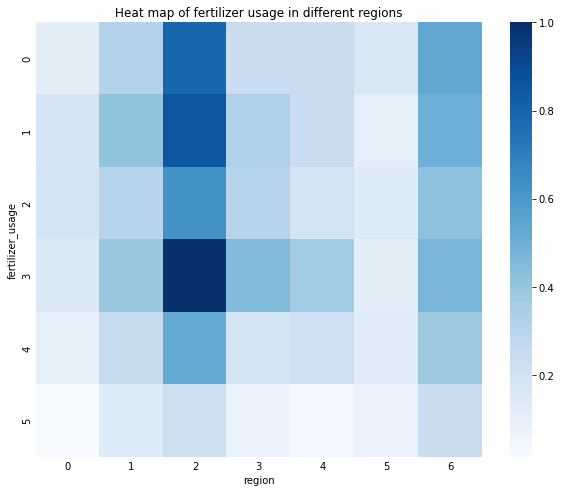

In [154]:

plt.figure(figsize = (10,8))
ax = seaborn.heatmap(agro_df_3_norm, cmap = 'Blues')

plt.tick_params(axis='both', length = 0)

plt.title('Heat map of fertilizer usage in different regions')

plt.show()

A bit of exploration with pivot tables 

In [155]:
agro_df

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
0,0,0.072,80.179,9.414,0,29.878,2.231,6,"c,b"
1,1,5.413,58.359,9.681,2,53.416,1.810,6,"c,b"
2,2,9.731,78.506,7.189,1,63.391,2.455,1,d
3,3,10.995,69.248,1.738,3,17.984,0.603,2,a
4,4,2.617,87.658,9.706,1,49.768,2.910,6,c
...,...,...,...,...,...,...,...,...,...
995,995,5.457,70.622,8.163,3,89.809,4.224,2,c
996,996,6.931,75.326,5.675,0,29.261,1.355,2,"d,b,a"
997,997,10.373,78.225,7.378,3,76.608,5.459,2,b
998,998,9.158,79.257,9.011,2,80.399,5.968,1,"d,c,b,a"


In [173]:
agro_df_pivot = agro_df.pivot_table(columns = 'region', index = 'fertilizer_usage', values = 'id', aggfunc = 'count')

In [174]:
agro_df_pivot_norm = agro_df_pivot/agro_df_pivot.max().max()

In [175]:
agro_df_pivot_norm

region,0,1,2,3,4,5,6
fertilizer_usage,,,,,,,
0,0.115385,0.320513,0.794872,0.243590,0.243590,0.166667,0.538462
1,0.179487,0.410256,0.846154,0.333333,0.243590,0.102564,0.500000
2,0.192308,0.307692,0.628205,0.307692,0.192308,0.141026,0.423077
3,0.153846,0.397436,1.000000,0.448718,0.371795,0.115385,0.474359
4,0.102564,0.256410,0.525641,0.192308,0.217949,0.128205,0.384615
5,0.012821,0.141026,0.230769,0.076923,0.038462,0.076923,0.243590
